<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/statistical_learning/demos/09_learning_curves_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Curves Demonstration

Goal:
- Visualize training vs test error as dataset size increases
- Diagnose high bias vs high variance
- Confirm theoretical intuition using synthetic data


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(42)

X = np.sort(np.random.rand(200, 1) * 6 - 3, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

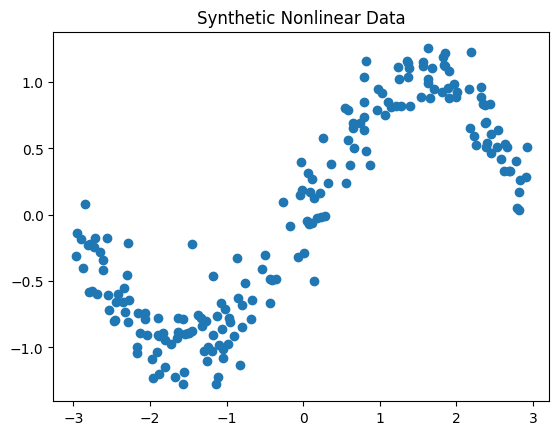

In [3]:
plt.scatter(X, y)
plt.title("Synthetic Nonlinear Data")
plt.show()

In [4]:
def plot_learning_curve(model, title):
    train_errors = []
    test_errors = []

    sizes = np.linspace(20, len(X), 10, dtype=int)

    for size in sizes:
        X_train, X_test, y_train, y_test = train_test_split(
            X[:size], y[:size], test_size=0.3, random_state=42
        )

        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_errors.append(mean_squared_error(y_train, y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))

    plt.plot(sizes, train_errors, label="Training Error")
    plt.plot(sizes, test_errors, label="Test Error")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

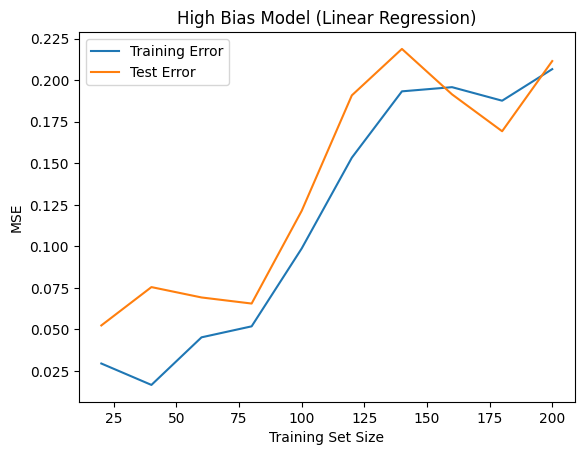

In [5]:
linear_model = LinearRegression()
plot_learning_curve(linear_model, "High Bias Model (Linear Regression)")

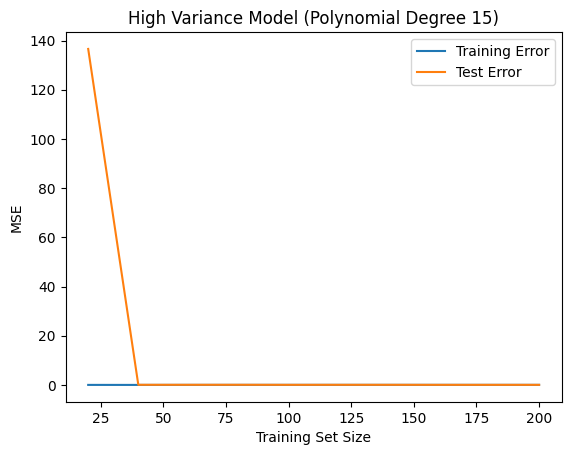

In [6]:
high_variance_model = make_pipeline(
    PolynomialFeatures(degree=15),
    LinearRegression()
)

plot_learning_curve(high_variance_model, "High Variance Model (Polynomial Degree 15)")

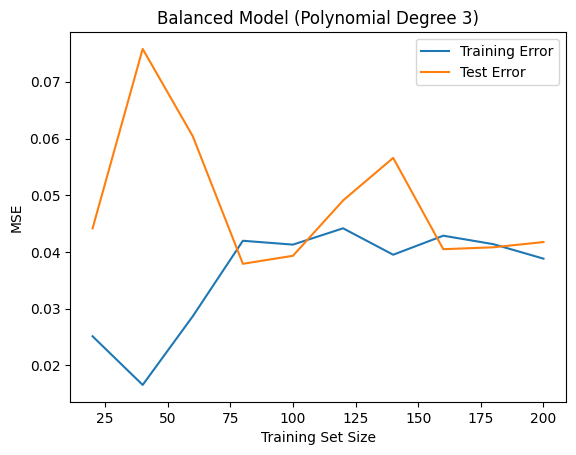

In [7]:
balanced_model = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)

plot_learning_curve(balanced_model, "Balanced Model (Polynomial Degree 3)")

Observations:

1. High Bias Model:
   - Training and test errors both high.
   - Adding more data does not significantly reduce error.
   - Model too simple.

2. High Variance Model:
   - Training error very low.
   - Test error high.
   - Large gap between curves.
   - More data reduces gap.

3. Balanced Model:
   - Both errors low.
   - Small gap.
   - Appropriate model complexity.

Learning curves diagnose whether to:
- Add more data
- Increase model flexibility
- Or simplify the model
